<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/12_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[사전 준비] 라이브러리 및 한글 폰트 설치**

(이 코드 셀은 실습 시작 전 맨 처음에 한 번만 실행해 주세요.)


In [5]:
# 필요 라이브러리 설치
!pip install statsmodels

# 코랩에서 한글 폰트 사용을 위한 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작 안내
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.
# 런타임을 다시 시작해야 한글 폰트가 적용됩니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

---


## **문제 1 (난이도: 하): 게임 아이템 뽑기 확률, 정말 10%일까?**

**시나리오:**
어떤 게임 개발사에서 새로운 아이템의 뽑기 확률이 10%로 설정되었다고 주장하고 있습니다. 유저 커뮤니티에서는 "실제 확률은 10%보다 낮은 것 같다"는 의혹이 제기되었습니다. 이를 확인하기 위해 한 유저가 아이템을 200번 뽑았고, 그중 12번 성공했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 이항검정(Binomial Test)을 사용하여, 이 유저의 결과(200번 중 12번 성공)가 개발사의 주장(P=0.1)을 기각하고 "확률이 10%보다 낮은 것 같다"는 의혹을 뒷받침할 만큼 통계적으로 유의미한지 검증하세요.


In [ ]:
from scipy.stats import binomtest

# 문제 설정
n = 200  # 총 시행 횟수
x = 12   # 관찰된 성공 횟수
p = 0.1  # 귀무가설에서의 성공 확률

# [작성] 가설
# H₀ (귀무가설): p = 0.1  (성공확률은 10%이다)
# H₁ (대립가설): p < 0.1  (성공확률은 10%보다 낮다)

# [작성] 이항검정 수행 (단측검정: less)
p_value = binomtest(k=x, n=n, p=p, alternative='less').pvalue

print(f"관찰 결과: {n}번 시도 중 {x}번 성공")
print(f"검정 결과 p-value: {p_value:.4f}")

# [작성] 통계적 결론
alpha = 0.05
if p_value < alpha:
    print("결론: 귀무가설(H₀)을 기각. 성공 확률이 10%보다 낮다고 볼 근거가 있다.")
else:
    print("결론: 귀무가설(H₀)을 기각하지 못함. 10%보다 낮다고 보기엔 근거가 부족하다.")


관찰 결과: 200번 시도 중 12번 성공
검정 결과 p-value: 0.0320
결론: 귀무가설(H₀)을 기각. 성공 확률이 10%보다 낮다고 볼 근거가 있다.


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** Part 1에서 계산된 p-값의 의미를 직접 눈으로 확인해 봅시다. **"만약 개발사의 주장대로 실제 확률이 정말 10%라면"**, 200번 뽑기를 했을 때 성공 횟수가 어떻게 분포하는지 시뮬레이션을 통해 알아보고, 우리가 관찰한 '12번 성공'이 얼마나 희귀한 일인지 확인하세요.


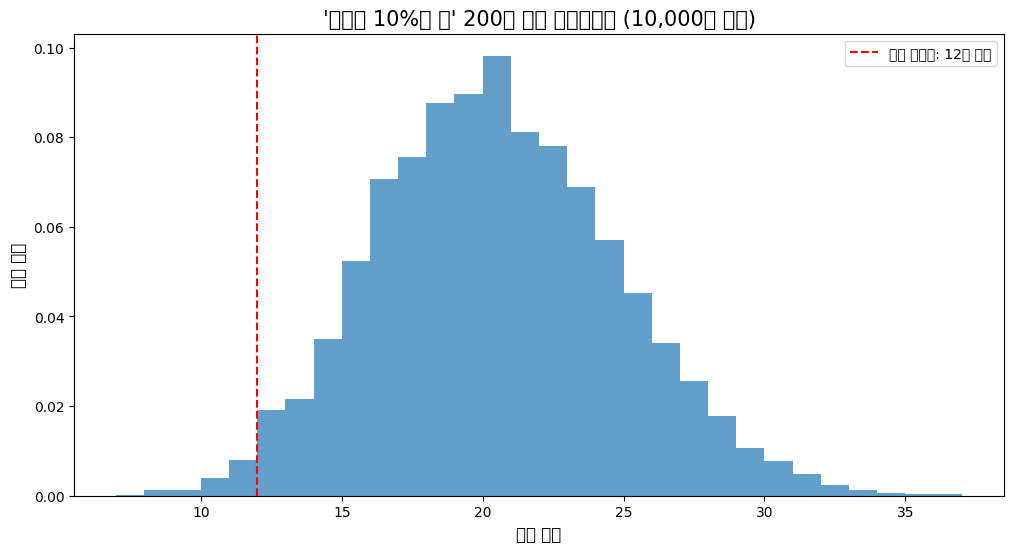

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 실제 확률 p = 0.1
# 200번 뽑기를 10,000번 반복 수행
num_simulations = 10000
n = 200
p = 0.1
x = 12

# [작성] 이항분포 시뮬레이션
simulated_successes = np.random.binomial(n=n, p=p, size=num_simulations)

# 2. 시각화
plt.figure(figsize=(12, 6))

# [작성] 히스토그램
plt.hist(
    simulated_successes,
    bins=30,
    density=True,
    alpha=0.7
)

plt.axvline(x=x, color='red', linestyle='--', label=f'실제 관찰값: {x}번 성공')
plt.title("'확률이 10%일 때' 200번 뽑기 시뮬레이션 (10,000회 반복)", fontsize=15)
plt.xlabel("성공 횟수", fontsize=12)
plt.ylabel("상대 빈도", fontsize=12)
plt.legend()
plt.show()


1. Part 1에서 구한 p-value는 Part 2 그래프의 어느 부분에 해당하며, 무엇을 의미하나요?
   관찰한 12회 성공보다 작거나 같은 값들이 차지하는 왼쪽 영역에 해당하며, 확률이 10%라고 가정했을 때 이런 결과가 나올 가능성을 의미한다

2. 시뮬레이션 그래프를 볼 때, 우리가 관찰한 12회 성공은 개발사의 주장이 맞다는 가정 하에 흔한 일인가요, 드문 일인가요?
   그래프의 왼쪽 꼬리에 위치하므로 흔한 일이라기보다 드문 일이다

3. 이 시뮬레이션 경험을 통해 "p-값이 작으면 귀무가설을 기각한다"는 규칙을 친구에게 어떻게 더 쉽게 설명할 수 있을까요?
   상대방 말이 맞다고 가정했는데 실제 결과가 거의 안 나오는 경우라면 그 말을 믿기 어렵다고 판단하는 거라고 설명할 수 있다


---


## **문제 2 (난이도: 하): 과자 한 봉지의 중량은 150g이 맞을까?**

**시나리오:**
한 식품 공장에서 생산하는 과자 한 봉지의 목표 중량은 150g입니다. 품질관리팀은 생산 공정이 목표 중량을 잘 맞추고 있는지 확인하기 위해, 생산된 과자 30봉지를 무작위로 추출하여 무게를 측정했습니다. (측정 데이터는 아래 코드에 제공)


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 일표본 t-검정(One-sample t-Test)을 사용하여, 추출된 과자 샘플의 평균 무게가 목표 중량 150g과 통계적으로 유의미한 차이가 있는지 검증하세요.


In [9]:
import numpy as np
from scipy.stats import ttest_1samp

# 주어진 데이터
np.random.seed(42)
sample_weights = np.random.normal(loc=151.5, scale=2, size=30)
pop_mean = 150  # 목표 중량 (모평균)

# [작성] 가설
# H₀ (귀무가설): μ = 150  (평균 무게는 150g이다)
# H₁ (대립가설): μ ≠ 150  (평균 무게는 150g이 아니다)

# [작성] 일표본 t-검정
t_statistic, p_value = ttest_1samp(sample_weights, pop_mean)

print(f"샘플 평균 무게: {np.mean(sample_weights):.2f}g")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# [작성] 통계적 결론
alpha = 0.05
if p_value < alpha:
    print("결론: 귀무가설(H₀)을 기각한다. 평균 무게는 150g과 다르다고 볼 수 있다.")
else:
    print("결론: 귀무가설(H₀)을 기각하지 못한다. 평균 무게가 150g과 다르다고 보기 어렵다.")


샘플 평균 무게: 151.12g
t-statistic: 3.4193
p-value: 0.0019
결론: 귀무가설(H₀)을 기각한다. 평균 무게는 150g과 다르다고 볼 수 있다.


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설이 사실일 때, 즉 **"과자 봉지의 평균 무게가 정확히 150g이라면"** 어떤 결과들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 이를 통해 우리가 실제로 관찰한 샘플 평균(약 151.5g)이 얼마나 특이한 값인지 직접 확인해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

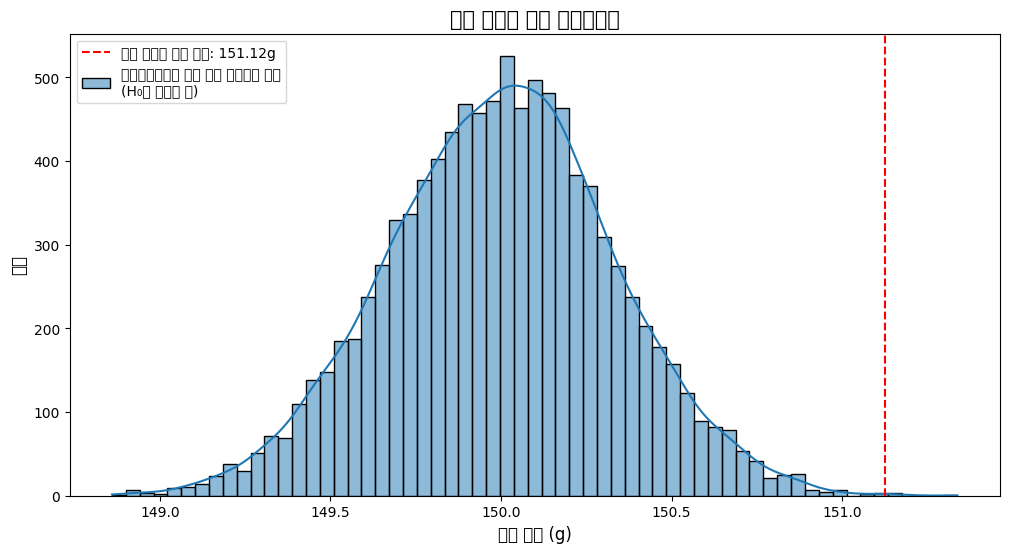

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 평균(loc) = 150g
# 표준편차는 우리가 가진 샘플의 표준편차 사용
num_simulations = 10000
sample_size = 30
simulated_means = []

pop_mean = 150
pop_std = np.std(sample_weights, ddof=1)

# [작성] 시뮬레이션 수행
for _ in range(num_simulations):
    sample = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size)
    simulated_means.append(np.mean(sample))

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(
    simulated_means,
    kde=True,
    label='시뮬레이션으로 얻은 표본 평균들의 분포\n(H₀가 사실일 때)'
)
plt.axvline(
    x=np.mean(sample_weights),
    color='red',
    linestyle='--',
    label=f'실제 관찰된 표본 평균: {np.mean(sample_weights):.2f}g'
)
plt.title("표본 평균의 분포 시뮬레이션", fontsize=15)
plt.xlabel("표본 평균 (g)", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()


1. Part 2의 히스토그램은 무엇을 나타내나요? 이 분포의 모양이 정규분포와 비슷한 이유는 무엇일까요?
   귀무가설이 참일 때 나올 수 있는 표본평균들의 분포를 나타내며, 중심극한정리 때문에 정규분포와 비슷해진다

2. 우리가 실제로 관찰한 표본 평균(빨간 점선)은 이 분포에서 흔하게 나타나는 값인가요? Part 1의 p-값과 이 시각적 위치는 어떻게 관련되나요?
   분포의 가운데면 흔하고 꼬리 쪽이면 드문 값이며, 점선이 꼬리로 갈수록 p-값은 작아진다

3. 만약 p-값이 0.001이었다면, 빨간 점선은 그래프의 어디쯤에 위치할 것으로 예상되나요? 이는 공장 입장에서 어떤 조치를 취해야 함을 시사할까요?
   분포의 끝 꼬리 아주 먼 곳에 위치할 것이며, 공정 이상 가능성이 높아 즉시 원인 점검과 조치가 필요함을 시사한다


---


## **문제 3 (난이도: 중): 어떤 온라인 학습 방식이 더 효과적일까?**

**시나리오:**
한 교육 기업에서 두 가지 다른 온라인 학습 방식(A, B)을 개발했습니다. 방식 A가 방식 B보다 학생들의 성적 향상에 더 효과적인지 알아보기 위해, 두 그룹의 학생들에게 각각 다른 방식으로 한 달간 학습시킨 후 시험을 보게 했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 이표본 t-검정(Two-sample t-Test)을 수행하여 두 학습 방식 간 평균 점수 차이가 통계적으로 유의미한지 확인하세요. (단, t-검정의 기본 가정인 정규성과 등분산성을 먼저 검증해야 합니다.)


In [11]:
import numpy as np
from scipy.stats import shapiro, levene, ttest_ind

# 데이터 생성
np.random.seed(0)
group_a_scores = np.random.normal(loc=85, scale=8, size=50)
group_b_scores = np.random.normal(loc=80, scale=7, size=50)

# 1. 정규성 검정 (Shapiro-Wilk test)
# H₀: 데이터는 정규분포를 따른다.
shapiro_a_pvalue = shapiro(group_a_scores).pvalue
shapiro_b_pvalue = shapiro(group_b_scores).pvalue

print(f"A그룹 정규성 검정 p-value: {shapiro_a_pvalue:.4f}")
print(f"B그룹 정규성 검정 p-value: {shapiro_b_pvalue:.4f}")

# 2. 등분산성 검정 (Levene's test)
# H₀: 두 그룹의 분산은 같다.
levene_pvalue = levene(group_a_scores, group_b_scores).pvalue
print(f"등분산성 검정 p-value: {levene_pvalue:.4f}")

# 3. 이표본 t-검정
# H₀: 두 그룹의 평균은 같다.
# H₁: 두 그룹의 평균은 다르다.
equal_var = levene_pvalue >= 0.05

t_statistic, p_value = ttest_ind(
    group_a_scores,
    group_b_scores,
    equal_var=equal_var
)

print(f"\n이표본 t-검정 t-statistic: {t_statistic:.4f}")
print(f"이표본 t-검정 p-value: {p_value:.4f}")


A그룹 정규성 검정 p-value: 0.8766
B그룹 정규성 검정 p-value: 0.8366
등분산성 검정 p-value: 0.0150

이표본 t-검정 t-statistic: 4.0426
이표본 t-검정 p-value: 0.0001


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설, 즉 **"두 학습 방식의 효과가 완전히 똑같다면"** 어떤 결과가 나타날지 시뮬레이션으로 확인해봅시다. 두 그룹의 점수 차이가 우연히 발생할 수 있는 범위를 눈으로 보고, 우리가 관찰한 실제 점수 차이가 그 범위 안에 있는지 확인해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

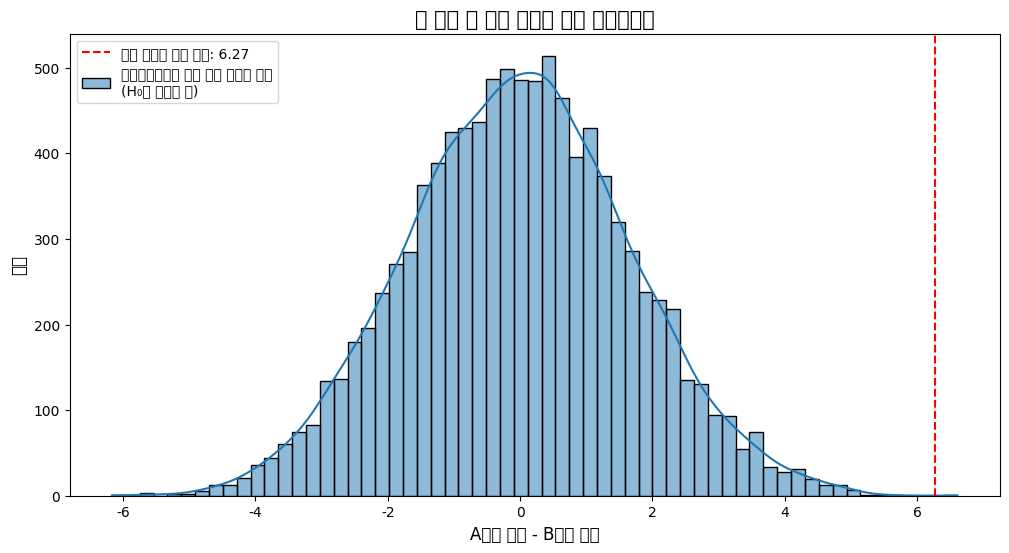

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 두 그룹의 평균은 같다.
combined_scores = np.concatenate([group_a_scores, group_b_scores])
num_simulations = 10000
simulated_diffs = []

# [작성] 시뮬레이션 수행
for _ in range(num_simulations):
    shuffled = np.random.permutation(combined_scores)
    simulated_a = shuffled[:50]
    simulated_b = shuffled[50:]
    simulated_diffs.append(np.mean(simulated_a) - np.mean(simulated_b))

# 2. 시각화
observed_diff = np.mean(group_a_scores) - np.mean(group_b_scores)

plt.figure(figsize=(12, 6))
sns.histplot(
    simulated_diffs,
    kde=True,
    label='시뮬레이션으로 얻은 평균 차이의 분포\n(H₀가 사실일 때)'
)
plt.axvline(
    x=observed_diff,
    color='red',
    linestyle='--',
    label=f'실제 관찰된 평균 차이: {observed_diff:.2f}'
)
plt.title("두 그룹 간 평균 차이의 분포 시뮬레이션", fontsize=15)
plt.xlabel("A그룹 평균 - B그룹 평균", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()


1. 정규성 검정과 등분산성 검정의 p-값은 각각 어떻게 해석해야 하나요? 이 결과는 우리가 이표본 t-검정을 사용하는 데 문제가 없음을 보여주나요?
   정규성 검정 p-값은 각 그룹이 정규분포에서 크게 벗어나는지 여부를, 등분산성 검정 p-값은 두 그룹의 분산이 비슷한지를 판단한다
   두 p-값이 충분히 크면 이표본 t-검정을 적용하는 데 큰 문제가 없다고 볼 수 있다

2. Part 2의 히스토그램 중심이 0에 가까운 이유는 무엇일까요?
   귀무가설에서 두 그룹의 평균이 같다고 가정하므로 평균 차이의 기대값이 0이기 때문이다

3. 실제 관찰된 평균 차이(빨간 점선)는 "두 방식의 효과가 같다"고 가정했을 때 우연히 나타날 수 있는 범위 안에 있나요, 아니면 그 범위를 벗어나나요? 이 시각적 판단과 Part 1의 p-값은 어떤 관계가 있나요?
   빨간 점선이 분포의 가운데에 있으면 우연히 나타날 수 있는 범위이고, 꼬리 쪽이면 그 범위를 벗어난 것이다
   이 시각적 위치는 p-값과 대응되며, 꼬리로 갈수록 p-값은 작아진다


---


## **문제 4 (난이도: 중): 연령대별로 선호하는 영화 장르가 다를까?**

**시나리오:**
한 영화관에서 고객의 연령대(20대, 30대, 40대)에 따라 선호하는 영화 장르(액션, 로맨스)에 차이가 있는지 궁금해졌습니다. 이를 알아보기 위해 300명의 고객을 대상으로 설문조사를 진행하여 아래와 같은 분할표를 얻었습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 카이제곱 독립성 검정(Chi-squared Test of Independence)을 사용하여 '연령대'와 '선호 장르'라는 두 범주형 변수 사이에 연관성이 있는지 검증하세요.


In [13]:
import pandas as pd
from scipy.stats import chi2_contingency

# 데이터 생성 (관측 빈도 분할표)
data = {'액션': [70, 50, 30],
        '로맨스': [30, 60, 60]}
observed = pd.DataFrame(data, index=['20대', '30대', '40대'])
print("관측 빈도 (Observed Frequencies):")
print(observed)

# [작성] 가설
# H₀ (귀무가설): 연령대와 영화 장르 선호는 서로 독립이다.
# H₁ (대립가설): 연령대와 영화 장르 선호는 서로 독립이 아니다.

# [작성] 카이제곱 독립성 검정
chi2, p_value, dof, expected = chi2_contingency(observed)

print(f"\nChi-squared statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\n기대 빈도 (Expected Frequencies):")
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))


관측 빈도 (Observed Frequencies):
     액션  로맨스
20대  70   30
30대  50   60
40대  30   60

Chi-squared statistic: 26.9091
p-value: 0.0000
Degrees of Freedom: 2

기대 빈도 (Expected Frequencies):
       액션   로맨스
20대  50.0  50.0
30대  55.0  55.0
40대  45.0  45.0


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설, 즉 **"연령대와 선호 장르가 서로 아무 관련이 없다면(독립이라면)"** 어떤 분할표들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 시뮬레이션을 통해 얻은 수많은 가상의 카이제곱 통계량 분포와 우리가 실제로 관찰한 카이제곱 통계량을 비교해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

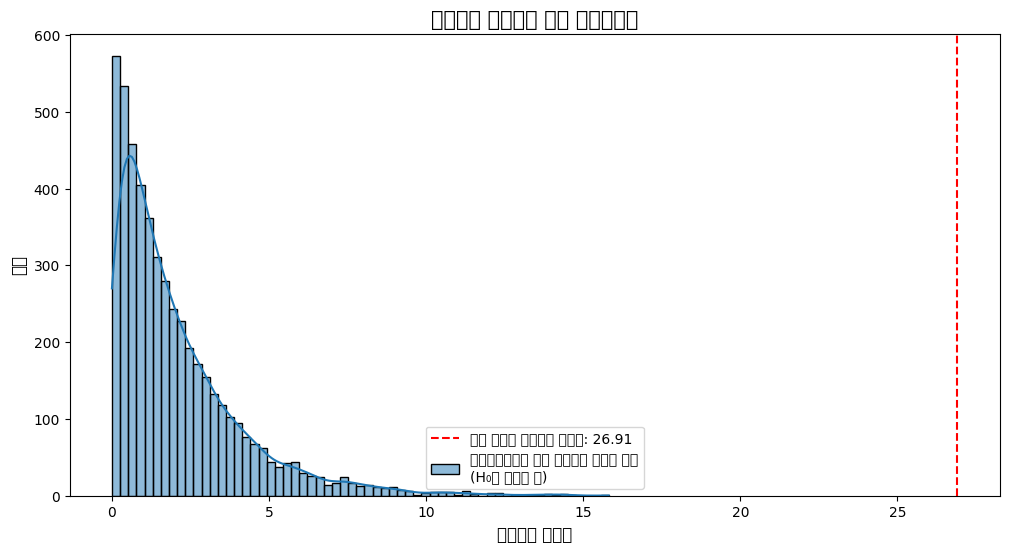

In [14]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 시뮬레이션 설정
total_people = observed.sum().sum()
p_genre = observed.sum(axis=0) / total_people  # 장르별 전체 비율
p_age = observed.sum(axis=1) / total_people    # 연령대별 전체 비율
num_simulations = 5000
simulated_chi2_stats = []

for _ in range(num_simulations):
    # 300명의 연령대와 장르를 독립적으로 생성
    sim_age = np.random.choice(p_age.index, size=total_people, p=p_age.values)
    sim_genre = np.random.choice(p_genre.index, size=total_people, p=p_genre.values)

    # 가상 분할표 생성
    sim_table = pd.crosstab(sim_age, sim_genre)

    # 원래 분할표와 동일한 행/열 순서로 맞추기 (누락된 범주가 생길 수 있어서)
    sim_table = sim_table.reindex(index=observed.index, columns=observed.columns, fill_value=0)

    # 카이제곱 통계량 계산
    chi2_sim, _, _, _ = stats.chi2_contingency(sim_table)
    simulated_chi2_stats.append(chi2_sim)

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(
    simulated_chi2_stats,
    kde=True,
    label='시뮬레이션으로 얻은 카이제곱 통계량 분포\n(H₀가 사실일 때)'
)
plt.axvline(x=chi2, color='red', linestyle='--', label=f'실제 관찰된 카이제곱 통계량: {chi2:.2f}')
plt.title("카이제곱 통계량의 분포 시뮬레이션", fontsize=15)
plt.xlabel("카이제곱 통계량", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()


1. ‘기대 빈도’는 어떤 의미를 가지며, ‘관측 빈도’와의 차이가 클수록 카이제곱 통계량은 어떻게 변할까요?
   두 변수가 독립이라고 가정했을 때 각 칸에 기대되는 값이며, 관측 빈도와의 차이가 클수록 카이제곱 통계량은 커진다

2. Part 2의 히스토그램은 어떤 분포를 시각화한 것인가요? 실제 관찰된 카이제곱 통계량(빨간 점선)은 이 분포에서 흔한 값인가요, 아니면 극단적인 값인가요?
   귀무가설이 참일 때의 카이제곱 통계량 분포를 나타내며, 빨간 점선이 오른쪽 꼬리에 가까울수록 극단적인 값이다

3. 유의수준 0.05에서, 연령대와 선호하는 영화 장르 사이에 통계적으로 유의미한 연관성이 있다고 결론 내릴 수 있습니까? 그 이유는 무엇인가요?
   p-값이 0.05보다 작다면 통계적으로 유의미한 연관성이 있다고 결론 내릴 수 있으며, 이는 두 변수가 독립이라는 가설을 기각했기 때문이다


---


## **문제 5 (난이도: 상): 어떤 신규 비료가 가장 효과적일까?**

**시나리오:**
한 농업 연구소에서 새로 개발한 비료 3종류(A, B, C)의 생산량 증대 효과를 비교하고자 합니다. 동일한 조건의 밭 30개를 준비하여, 각각 10개씩 비료 A, B, C를 투여한 후 수확량을 측정했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:**

1.  분산분석(ANOVA)을 사용하여 세 비료 간 수확량 평균에 유의미한 차이가 있는지 검증하세요.
2.  만약 ANOVA 검정 결과가 유의미하다면, 어떤 비료가 다른 비료와 차이를 보이는지 확인하기 위해 사후분석(Post-hoc test)인 **Tukey's HSD 검정**을 수행하고 결과를 해석하세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

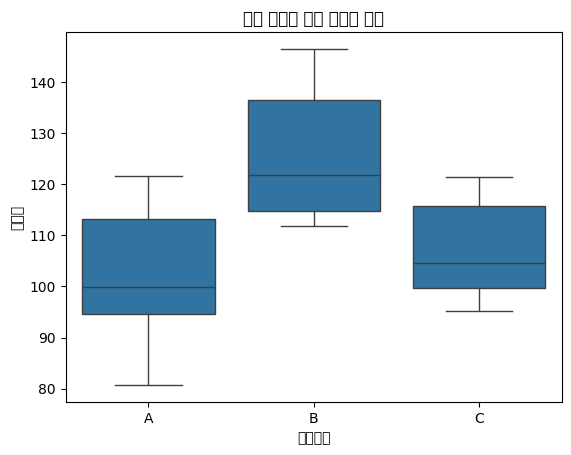

ANOVA F-statistic: 10.3455
ANOVA p-value: 0.0005

Tukey's HSD 사후분석 결과:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  23.6754 0.0006  10.0402 37.3106   True
     A      C   4.8429 0.6569  -8.7923 18.4781  False
     B      C -18.8325 0.0054 -32.4677 -5.1972   True
-----------------------------------------------------


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 데이터 생성
np.random.seed(123)
fertilizer_a = np.random.normal(loc=105, scale=10, size=10)
fertilizer_b = np.random.normal(loc=120, scale=12, size=10)
fertilizer_c = np.random.normal(loc=108, scale=9, size=10)

# 데이터프레임
df = pd.DataFrame({
    '수확량': np.concatenate([fertilizer_a, fertilizer_b, fertilizer_c]),
    '비료종류': ['A']*10 + ['B']*10 + ['C']*10
})

# 1. 시각화
sns.boxplot(x='비료종류', y='수확량', data=df)
plt.title('비료 종류에 따른 수확량 분포')
plt.show()

# 2. 분산분석 (ANOVA)
# H₀: 세 비료의 평균 수확량은 모두 같다.
# H₁: 적어도 하나 이상의 비료 평균 수확량은 다르다.
f_statistic, p_value = f_oneway(fertilizer_a, fertilizer_b, fertilizer_c)

print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

# 3. 사후분석 (Tukey's HSD)
if p_value < 0.05:
    tukey_result = pairwise_tukeyhsd(
        endog=df['수확량'],
        groups=df['비료종류'],
        alpha=0.05
    )
    print("\nTukey's HSD 사후분석 결과:")
    print(tukey_result)
else:
    print("\nANOVA 결과가 유의미하지 않으므로 사후분석을 수행하지 않습니다.")


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** ANOVA의 귀무가설, 즉 **"세 비료의 효과가 완전히 똑같다면"** 어떤 F-통계량 값들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 이를 통해 우리가 실제로 관찰한 F-통계량이 얼마나 극단적인 값인지 직접 확인해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

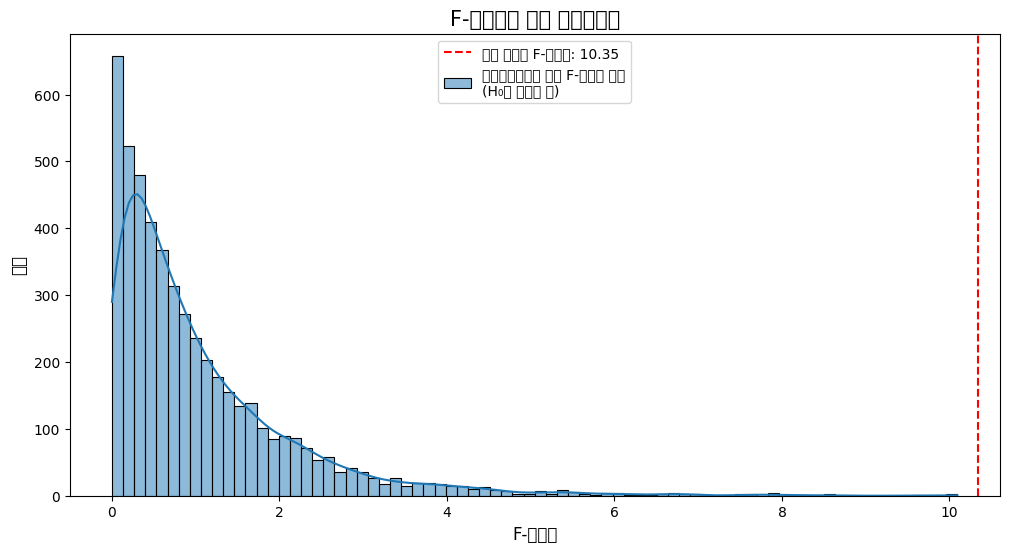

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# 1. 시뮬레이션 설정
combined_harvest = df['수확량']
grand_mean = combined_harvest.mean()
grand_std = combined_harvest.std(ddof=1)
num_simulations = 5000
simulated_f_stats = []

for _ in range(num_simulations):
    sim_a = np.random.normal(loc=grand_mean, scale=grand_std, size=10)
    sim_b = np.random.normal(loc=grand_mean, scale=grand_std, size=10)
    sim_c = np.random.normal(loc=grand_mean, scale=grand_std, size=10)

    f_sim, _ = f_oneway(sim_a, sim_b, sim_c)
    simulated_f_stats.append(f_sim)

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(
    simulated_f_stats,
    kde=True,
    label='시뮬레이션으로 얻은 F-통계량 분포\n(H₀가 사실일 때)'
)
plt.axvline(x=f_statistic, color='red', linestyle='--', label=f'실제 관찰된 F-통계량: {f_statistic:.2f}')
plt.title("F-통계량의 분포 시뮬레이션", fontsize=15)
plt.xlabel("F-통계량", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()


1. ANOVA 검정의 p-값을 통해 어떤 결론을 내릴 수 있나요? 이 결과는 "세 비료가 모두 동일한 효과를 가진다"는 것을 의미하나요, 아니면 "적어도 하나는 다르다"는 것을 의미하나요?
   p-값이 유의수준보다 작다면 세 비료의 평균이 모두 같다는 가설을 기각하며, 적어도 하나 이상의 비료는 평균 수확량이 다르다는 것을 의미한다

2. Tukey's HSD 결과표의 `reject` 열을 보세요. `True`로 표시된 조합은 무엇이며, 이는 무엇을 의미하나요? `meandiff` 열의 값은 어떤 정보를 주나요?
   `reject=True`인 조합은 두 비료 간 평균 수확량 차이가 통계적으로 유의미하다는 뜻이다
   `meandiff`는 두 비료 평균 수확량의 차이 크기와 방향을 나타낸다

3. 이 모든 분석 결과를 종합하여, 연구소에 어떤 비료를 추천하고 그 이유는 무엇인지 비즈니스 관점에서 설명해 보세요.
   ANOVA와 사후분석에서 평균 수확량이 유의하게 높은 비료가 있다면 그 비료를 추천할 수 있으며, 이는 동일한 조건에서 더 높은 생산성을 기대할 수 있어 비용 대비 효율과 수익성을 개선할 수 있기 때문이다
